# Tutorial of CNN using Keras with Theano backend
## Environment setup
Python3 uses Tensorflow as default backend. 
So we have to export environment variable `KERAS_BACKEND`
to specify the backend we are using.

In [1]:
import os
os.environ['KERAS_BACKEND']='theano'
! echo ${KERAS_BACKEND}

theano


Then we are able to import Theano and keras and see their versions.

In [2]:
import theano
import keras

print (theano.__version__)
print (keras.__version__)

/home/minan/.virtualenvs/ve-py2/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


1.0.1
2.1.5


The libraries we are going to use are imported here.

In [3]:
import numpy as np
# models
from keras.models import Sequential
# core layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# utilities
from keras.utils import np_utils, plot_model
# plotting
from matplotlib import pyplot as plt

## Download the MNIST images
The Keras library has it already!

In [4]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [5]:
print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


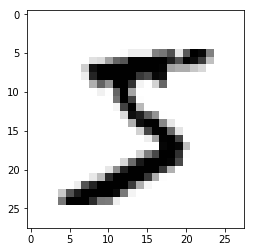

In [6]:
plt.set_cmap('binary')
plt.imshow(X_train[0])

## Prepocessing the data
Images are reshaped to tensor of size 1x28x28 and $[0,1]$ float data.

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print (X_train.shape)

(60000, 28, 28, 1)


Labels are transformed from label name to one-hot encoded categorical by using `to_categorical`

In [8]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("original label: ", y_test[0])
print("one-hot encoded label: ", Y_test[0])

('original label: ', 7)
('one-hot encoded label: ', array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))


## Model bulidup
We use Keras `Sequential()` to build our model.
(Document here: https://keras.io/getting-started/sequential-model-guide/)

For feature layers,
we build a model with 2 layers of CNN with ReLU as activation function
by using `Conv2D()` and setting `activation` attribute to `'relu'`.
After that there is a max pooling layer `MaxPooling2D()`
and a dropout layer `Dropout()`.
For classification layers,
we first flatten out the layers by using `Flatten()`,
and use a fully connected layer `Dense()`
with ReLU as activation function.
Then dropout again and another fully connected layer ended with a soft-max classifier.

Finally, use `summary()` function 
to summarize all shapes and parameters of this model architecture.

In [9]:
# first define the model to be sequential
model = Sequential()
# feature layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# classifier layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# print the model architecture
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

Use `compile()` function of the model
to setup the loss function, the optimization algorithm,
and the validation metrics.

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Then we use `fit()` to enable the training procedures.
We can assign `history` as the function output
to memorize all the training details for visualization later on.

In [11]:
history = model.fit(X_train, Y_train, 
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 232s 5ms/step - loss: 0.2338 - acc: 0.9284 - val_loss: 0.0647 - val_acc: 0.9802
Epoch 2/10
48000/48000 [==============================] - 536s 11ms/step - loss: 0.0970 - acc: 0.9705 - val_loss: 0.0455 - val_acc: 0.9868
Epoch 3/10
48000/48000 [==============================] - 536s 11ms/step - loss: 0.0721 - acc: 0.9777 - val_loss: 0.0430 - val_acc: 0.9866
Epoch 4/10
48000/48000 [==============================] - 365s 8ms/step - loss: 0.0621 - acc: 0.9807 - val_loss: 0.0378 - val_acc: 0.9898
Epoch 5/10
48000/48000 [==============================] - 205s 4ms/step - loss: 0.0521 - acc: 0.9841 - val_loss: 0.0409 - val_acc: 0.9880
Epoch 6/10
48000/48000 [==============================] - 209s 4ms/step - loss: 0.0480 - acc: 0.9846 - val_loss: 0.0400 - val_acc: 0.9902
Epoch 7/10
48000/48000 [==============================] - 231s 5ms/step - loss: 0.0405 - acc: 0.9870 - val_loss: 0.0360 

After training finishes, we can see what is inside `history` that we can look into.

In [12]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


Visualizing the training history.

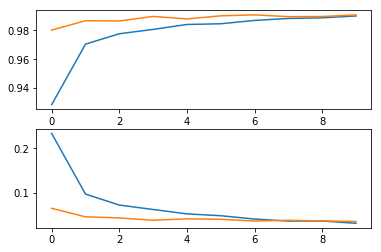

In [13]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Evaluate the model on the test data set.

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test loss = ", test_loss)
print("Test accuracy = ", test_acc)

10000/10000 [==============================] - 16s 2ms/step
('Test loss = ', 0.030969175917699796)
('Test accuracy = ', 0.9906)


Visualize the weights of the first CNN layer by calling `get_weights()` method.
`model.layers[0]` indicates the first CNN layer,
and `w[0]` indicates the weights of 32 3x3 kernels,
while `w[1]` indicates the corresponding bias.

<Figure size 432x288 with 0 Axes>

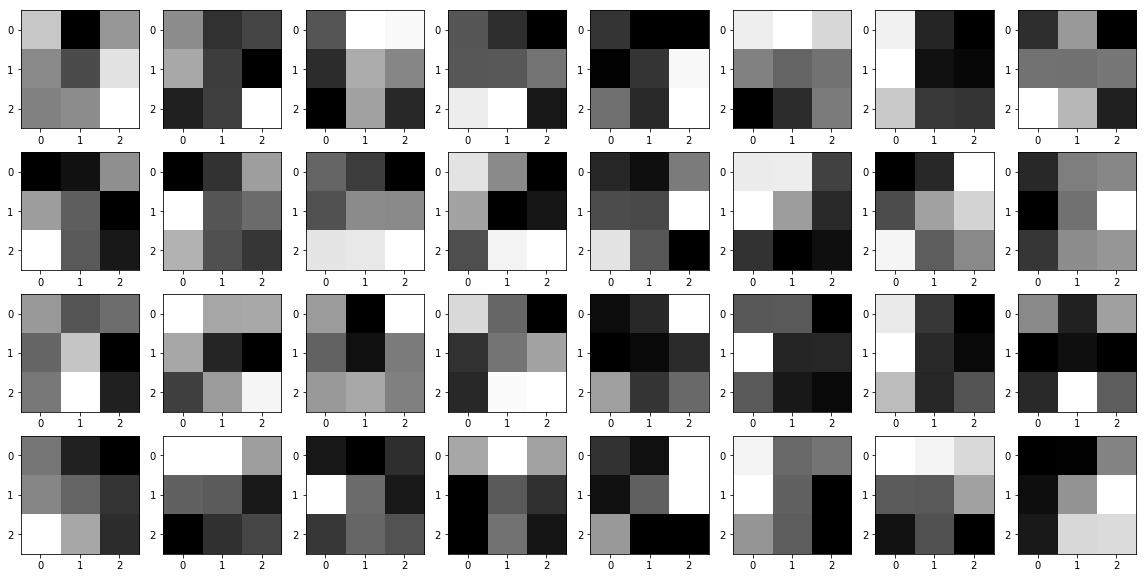

In [15]:
w = model.layers[0].get_weights()
w = np.reshape(w[0],(3,3,32))
plt.set_cmap('binary')
f, axarr = plt.subplots(4, 8, figsize=(20,10))
for i in range(32):
    a = int(i/8)
    b = i%8
    axarr[a,b].imshow(w[:,:,i])

## Save the model

In [16]:
! mkdir -p models

In [17]:
model.save_weights("models/model_keras_cnn.h5")
print("Saved model to disk")

Saved model to disk
